<img alt="Insight logo" src="https://image.cagle.com/161714/750/161714.png" align="left" hspace="10px" vspace="10px" width=100% height=50% >

<p style="font-size:20px; font-family: Trebuchet MS; font-style:italic;"> This dataset contains information about airplane crashes around the world. The data spans <span style="color:#122ecc;"> September 1908 to August 2008</span>. A variety of entities broadcast data about the air crashes, including<span style="color:#122ecc;"> country, continent, operator, fatality, aircraft type and reason for the accident</spaes.p />

<p><img alt="Insight logo" src="https://raw.githubusercontent.com/warazkhan/Data-Analysis-Project/main/favpng_fountain-pen-book-ballpoint-pen.png" align="left" hspace="10px" vspace="5px" width="50" height="60" ></p>

<ul style="list-style-type:none;">
  <li style="font-weight: bold;font-family:Trebuchet MS;font-size:35px;font-style: italic;color:  bleu">Notebook highlights    </li>
</ul>

<div class="alert alert-info" role="alert">
<ul style="list-style-type:circle;font-family:Trebuchet MS;font-size:17px;color:black">
    <li>The aim of this notebook is to present a proper approach to the questioning of datasets while maintaining the main objective of extracting various interesting facts.</li>
    <li>This notebook uses <span style="color:#122ecc;">Wordcloud, Scikit-learn, Pandas, Numpy, Matplot and some other libraries </span> to plot data points.</li>  
</ul>
</div>

<p><img alt="Insight logo" src="https://raw.githubusercontent.com/warazkhan/Data-Analysis-Project/main/favpng_question-mark-sign-symbol.png" align="left" hspace="25px" vspace="5px" width="40" height="50" ></p>

<ul style="list-style-type:none;">
  <li style="font-weight: bold;font-family:Trebuchet MS;font-size:35px;font-style: italic;color:bleu">Basic Questions</li>
</ul>

<div class="alert alert-danger" role="alert">
<ul style="list-style-type:circle;font-family:Trebuchet MS;font-size:17px;color:black">
    <li>How<span style="color:#122ecc;"> many air crashes</span> occur in the world on <span style="color:#122ecc;">average each year</span>?</li>
    <li>What are the <span style="color:#122ecc;">most affected hours </span>for air crashes around the world?</li>
    <li>Which are the <span style="color:#122ecc;">most affected air operators </span>for air crashes around the world?</li>
    <li>Which<span style="color:#122ecc;"> year</span> had the <span style="color:#122ecc;">most air crashes</span> in the world?</li>
        <li>Which <span style="color:#122ecc;">country</span> has reported the<span style="color:#122ecc;"> most air crashes</span> between 1908 and 2009? ?</li>
    <li>Which <span style="color:#122ecc;">country</span> has reported the<span style="color:#122ecc;"> most fatilities</span> due to air crashes between 1908 and 2009? ?</li>
    <li>Which <span style="color:#122ecc;">continent</span> has reported the<span style="color:#122ecc;"> most air crashes</span> between 1908 and 2009? ?</li>
    <li>Which <span style="color:#122ecc;">continent</span> has reported the<span style="color:#122ecc;"> most fatilities</span> due to air crashes between 1908 and 2009? ?</li>
    <li>How much are the <span style="color:#122ecc;">survival</span> and <span style="color:#122ecc;">fatality chances </span>in air crashes?</li>


</ul>
</div>

<p><img alt="Insight logo" src="https://raw.githubusercontent.com/warazkhan/Data-Analysis-Project/main/DataAnalysislogo.png" align="left" hspace="25px" vspace="5px" width="100" height="80" ></p>

<ul style="list-style-type:none;">
  <li style="font-weight: bold;font-family:Trebuchet MS;font-size:35px;font-style: italic;color:bleu">Data Preprocessing </li>
</ul>
<ul style="list-style-type:none;font-family:Trebuchet MS;font-size:17px;color:black">
    <li> Downloading, cleaning, and preparing the Dataset</li> 
</ul>

In [1]:
#Install all the required libraries using pip 
!pip install networkx

In [2]:
# Import all the required libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib as plt
from sklearn.impute import SimpleImputer
from datetime import datetime
import plotly.express as px

In [3]:
# read & load the dataset into pandas dataframe
crashesDataframe = pd.read_csv(r"Airplane_Crashes_and_Fatalities_Since_1908.csv")

In [4]:
obs, feat = crashesDataframe.shape
crashesDataframe.sample(5)

Date   Time                         Location  \
3974  11/11/1990    NaN             Novossibirsk, Russia   
2471  05/26/1971  15:00      Near Capetown, South Africa   
3312  10/26/1981  18:24  St. Thomas, U.S. Virgin Islands   
150   08/25/1928    NaN   Near Port Townsend, BC, Canada   
5039  02/22/2005  07:15                              NaN   

                                             Operator Flight #  \
3974  MAP - Ministerstvo Aviatsionnoi Promyshlennosti      NaN   
2471               Military - South African Air Force      NaN   
3312                                  Aerolineas Argo      NaN   
150                          British Columbia Airways      NaN   
5039                       Indonesian National Police      NaN   

                           Route                             Type  \
3974                         NaN                     Antonov AN-8   
2471                         NaN  Hawker Siddeley HS 125-400B (3)   
3312  Saint Croix - Saint Thomas    Lockheed L-749A Constellation   
150           Victoria - Seattle            Ford 4-AT-B Tri Motor   
5039            Jayapura - Sarmi                 CASA 212 Aviocar   

      Registration              cn/In  Aboard  Fatalities  Ground  \
3974    CCCP-69320            0B-3420    10.0         9.0     0.0   
2471  01 / 02 / 03  25177/25181/25182    11.0        11.0     0.0   
3312        HI-328               2607     5.0         5.0     0.0   
150         G-CATX            4-AT-26     7.0         7.0     0.0   
5039           NaN                NaN    18.0        15.0     0.0   

                                                Summary  
3974  The cargo plane crashed after both engines fla...  
2471  All three planes crashed into Devil's Peak  an...  
3312  After executing a turn to avoid traffithe carg...  
150   Crashed into Puget Sound in dense fog.  Consid...  
5039  On final approach, the aircraft crashed into t...

In [5]:
print(str("Dataset consist of " + str(obs) + " observations (crashes) and " + str(feat) + " features. Features are following:"))

Dataset consist of 5268 observations (crashes) and 13 features. Features are following:


*  **Date** (date the crash had taken place)
* **Time** (time the crash had taken place)
* **Location** 
* **Operator **
* **Flight #** 
* **Route**
* **Type**
* **Registration**
* **cn/In ** - ?
* **Aboard **  - number of people aboard
* **Fatalities ** - lethal outcome
* **Ground** - saved people
* **Summary ** - brief summary of the case

In [6]:
crashesDataframe.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5268 entries, 0 to 5267
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Date          5268 non-null   object 
 1   Time          3049 non-null   object 
 2   Location      5248 non-null   object 
 3   Operator      5250 non-null   object 
 4   Flight #      1069 non-null   object 
 5   Route         3561 non-null   object 
 6   Type          5241 non-null   object 
 7   Registration  4933 non-null   object 
 8   cn/In         4040 non-null   object 
 9   Aboard        5246 non-null   float64
 10  Fatalities    5256 non-null   float64
 11  Ground        5246 non-null   float64
 12  Summary       4878 non-null   object 
dtypes: float64(3), object(10)
memory usage: 535.2+ KB


In [7]:
crashesDataframe.isnull().sum() #calculating missing values in rows

Date               0
Time            2219
Location          20
Operator          18
Flight #        4199
Route           1707
Type              27
Registration     335
cn/In           1228
Aboard            22
Fatalities        12
Ground            22
Summary          390
dtype: int64

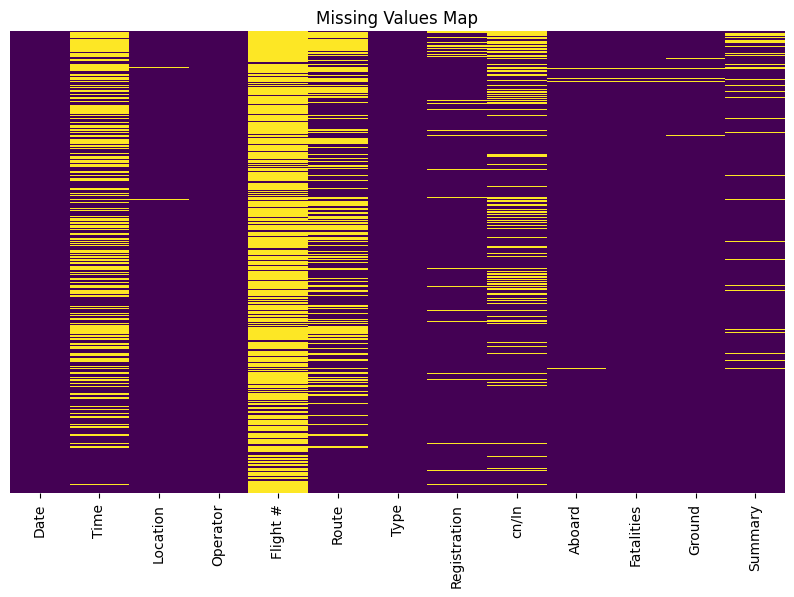

In [8]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
sns.heatmap(crashesDataframe.isnull(), cmap='viridis', cbar=False, yticklabels=False)
plt.title('Missing Values Map')
plt.show()

## Data manipulation

we want to create a new row with 'Date + Time' format. I replaced all the missing values of Time with 0:00. Then I removed some wrong symbols and fixed broken values. 

In [9]:
#cleaning up
crashesDataframe['Time'] = crashesDataframe['Time'].replace(np.nan, '00:00') 
crashesDataframe['Time'] = crashesDataframe['Time'].str.replace('c: ', '')
crashesDataframe['Time'] = crashesDataframe['Time'].str.replace('c:', '')
crashesDataframe['Time'] = crashesDataframe['Time'].str.replace('c', '')
crashesDataframe['Time'] = crashesDataframe['Time'].str.replace('12\'20', '12:20')
crashesDataframe['Time'] = crashesDataframe['Time'].str.replace('18.40', '18:40')
crashesDataframe['Time'] = crashesDataframe['Time'].str.replace('0943', '09:43')
crashesDataframe['Time'] = crashesDataframe['Time'].str.replace('22\'08', '22:08')
crashesDataframe['Time'] = crashesDataframe['Time'].str.replace('114:20', '00:00') #is it 11:20 or 14:20 or smth else? 

crashesDataframe['Time'] = crashesDataframe['Date'] + ' ' + crashesDataframe['Time'] #joining two rows
def todate(x):
    return datetime.strptime(x, '%m/%d/%Y %H:%M')
crashesDataframe['Time'] = crashesDataframe['Time'].apply(todate) #convert to date type
print('Date ranges from ' + str(crashesDataframe.Time.min()) + ' to ' + str(crashesDataframe.Time.max()))

crashesDataframe.Operator = crashesDataframe.Operator.str.upper() #just to avoid duplicates like 'British Airlines' and 'BRITISH Airlines'

Date ranges from 1908-09-17 17:18:00 to 2009-06-08 00:00:00


<p><img alt="Insight logo" src="https://raw.githubusercontent.com/warazkhan/Data-Analysis-Project/main/year-logo.png" align="left" hspace="25px" vspace="5px" width="90" height="80" ></p>
 <br>
<ul style="list-style-type:none;">
  <li style="font-weight: bold;font-family:Trebuchet MS;font-size:35px;font-style: italic;color:bleu">&emsp;Analysis by Year</li>
</ul>

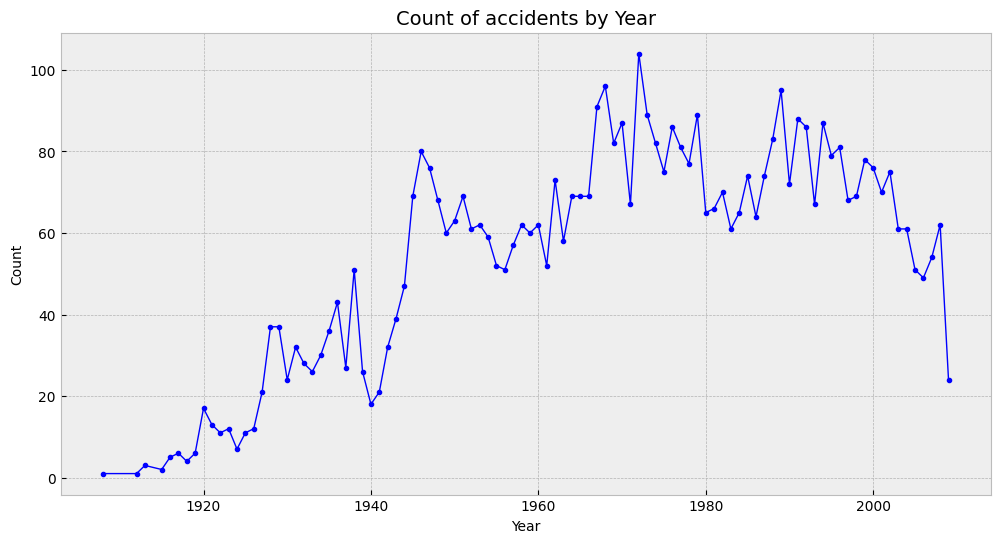

In [10]:
Temp = crashesDataframe.groupby(crashesDataframe.Time.dt.year)[['Date']].count() #Temp is going to be temporary data frame 
Temp = Temp.rename(columns={"Date": "Count"})

plt.figure(figsize=(12,6))
plt.style.use('bmh')
plt.plot(Temp.index, 'Count', data=Temp, color='blue', marker = ".", linewidth=1)
plt.xlabel('Year', fontsize=10)
plt.ylabel('Count', fontsize=10)
plt.title('Count of accidents by Year', loc='Center', fontsize=14)
plt.show()

<p><img alt="Insight logo" src="https://raw.githubusercontent.com/warazkhan/Data-Analysis-Project/main/time-logo.png" align="left" hspace="25px" vspace="5px" width="90" height="80" ></p>

<ul style="list-style-type:none;">
  <li style="font-weight: bold;font-family:Trebuchet MS;font-size:35px;font-style: italic;color:bleu">&emsp;Analysis by Time</li>
</ul>

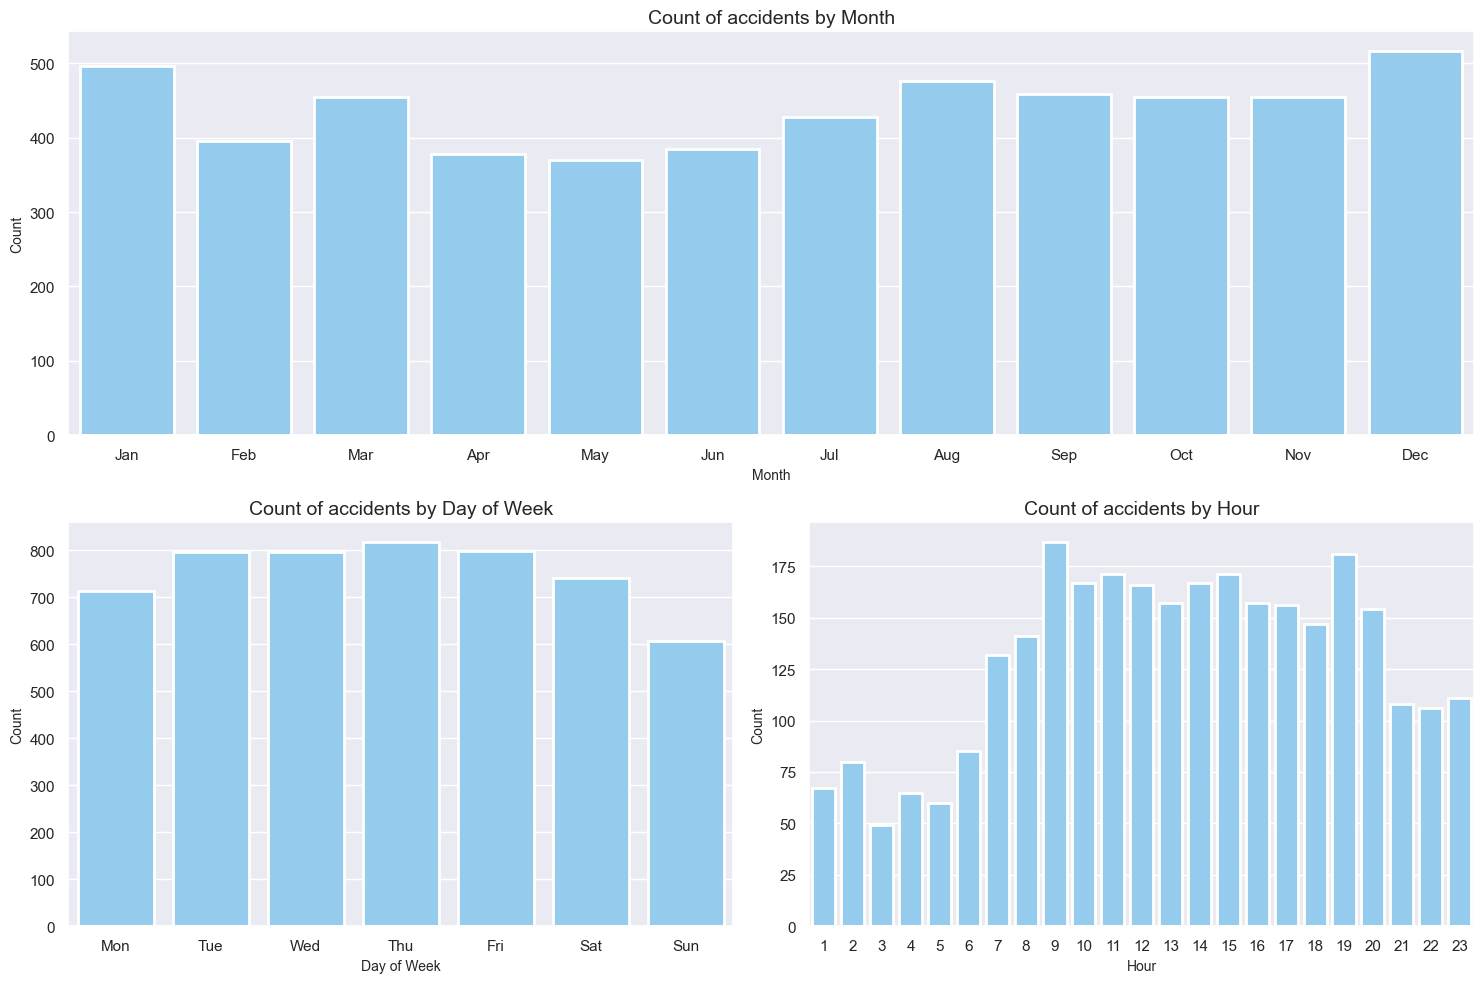

In [11]:
import matplotlib.pylab as pl
import matplotlib.gridspec as gridspec
import seaborn as sns
import matplotlib.pyplot as plt

gs = gridspec.GridSpec(2, 2)
pl.figure(figsize=(15, 10))
sns.set()

# Plot 1
ax = pl.subplot(gs[0, :])  # row 0, col 0
monthly_counts = crashesDataframe.groupby(crashesDataframe.Time.dt.month)[['Date']].count().reset_index()
sns.barplot(x='Time', y='Date', data=monthly_counts, color='lightskyblue', linewidth=2)
plt.xticks(monthly_counts['Time']-1,['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])
plt.xlabel('Month', fontsize=10)
plt.ylabel('Count', fontsize=10)
plt.title('Count of accidents by Month', loc='Center', fontsize=14)

# Plot 2
ax = pl.subplot(gs[1, 0])
weekday_counts = crashesDataframe.groupby(crashesDataframe.Time.dt.weekday)[['Date']].count().reset_index()
sns.barplot(x='Time', y='Date', data=weekday_counts, color='lightskyblue', linewidth=2)
plt.xticks(weekday_counts['Time'], ['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun'])
plt.xlabel('Day of Week', fontsize=10)
plt.ylabel('Count', fontsize=10)
plt.title('Count of accidents by Day of Week', loc='Center', fontsize=14)

# Plot 3
ax = pl.subplot(gs[1, 1])
hourly_counts = crashesDataframe[crashesDataframe.Time.dt.hour != 0].groupby(crashesDataframe.Time.dt.hour)[['Date']].count().reset_index()
sns.barplot(x='Time', y='Date', data=hourly_counts, color='lightskyblue', linewidth=2)
plt.xlabel('Hour', fontsize=10)
plt.ylabel('Count', fontsize=10)
plt.title('Count of accidents by Hour', loc='Center', fontsize=14)

plt.tight_layout()
plt.show()


<p><img alt="Insight logo" src="https://cdn5.vectorstock.com/i/1000x1000/72/54/planes-top-view-jet-military-aircraft-flat-vector-26647254.jpg" align="left" hspace="25px" vspace="5px" width="90" height="80" ></p>

<ul style="list-style-type:none;">
  <li style="font-weight: bold;font-family:Trebuchet MS;font-size:35px;font-style: italic;color:bleu">&emsp;Analysis by Type</li>
</ul>

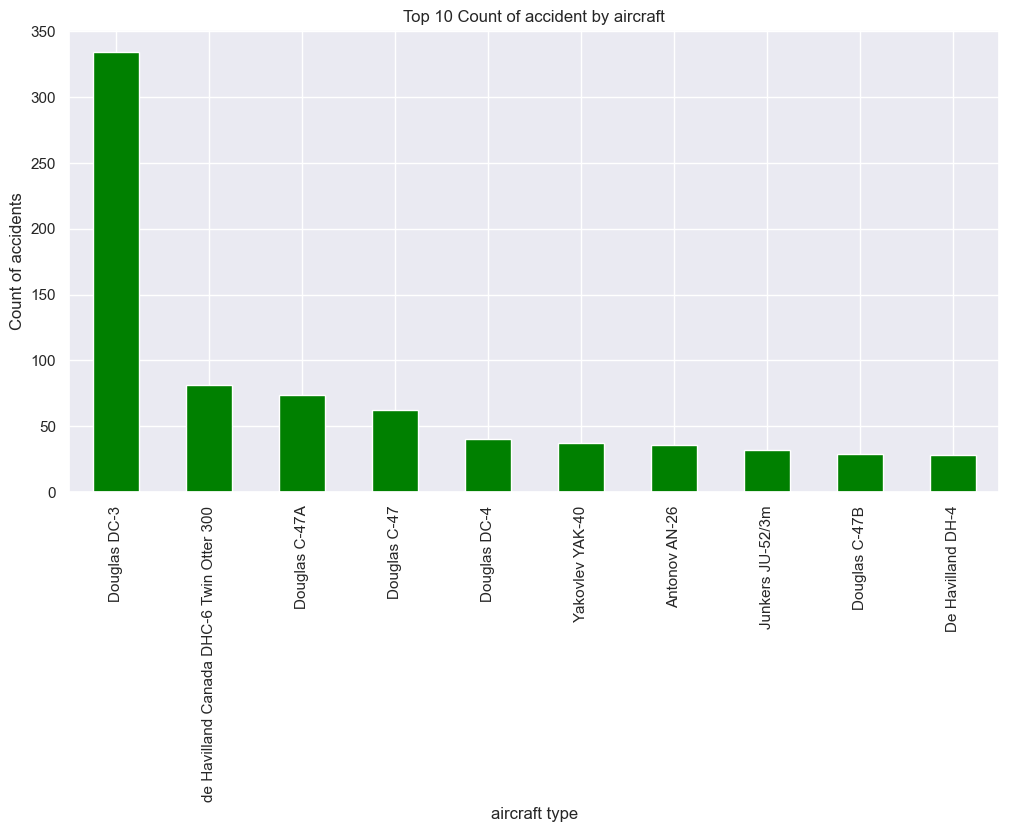

In [12]:
top_aircraft_types = crashesDataframe['Type'].value_counts().head(10)


plt.figure(figsize=(12, 6))
top_aircraft_types.plot(kind='bar', color='green')
plt.title('Top 10 Count of accident by aircraft')
plt.xlabel('aircraft type')
plt.ylabel('Count of accidents')
plt.show()

### Military vs Passenger flights

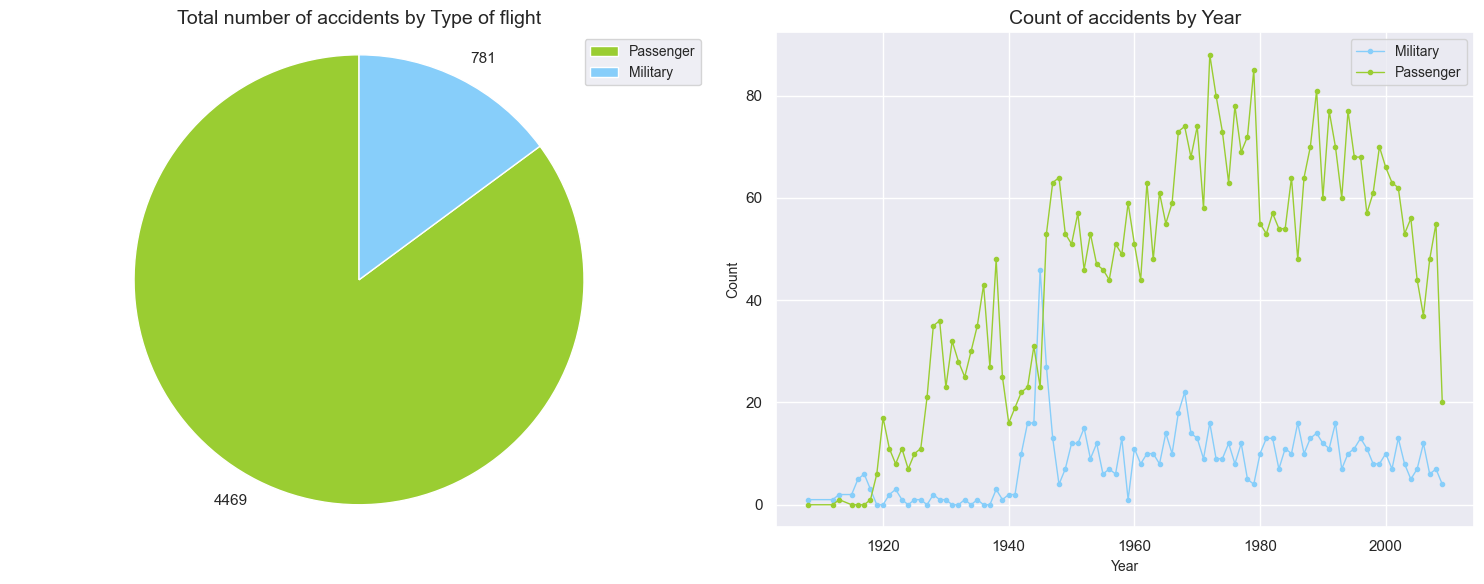

In [13]:
Temp = crashesDataframe.copy()
Temp['isMilitary'] = Temp.Operator.str.contains('MILITARY')
Temp = Temp.groupby('isMilitary')[['isMilitary']].count()
Temp.index = ['Passenger', 'Military']

Temp2 = crashesDataframe.copy()
Temp2['Military'] = Temp2.Operator.str.contains('MILITARY')
Temp2['Passenger'] = Temp2.Military == False
Temp2 = Temp2.loc[:, ['Time', 'Military', 'Passenger']]
Temp2 = Temp2.groupby(Temp2.Time.dt.year)[['Military', 'Passenger']].aggregate(np.count_nonzero)

colors = ['yellowgreen', 'lightskyblue']
plt.figure(figsize=(15,6))
plt.subplot(1, 2, 1)
patches, texts = plt.pie(Temp.isMilitary, colors=colors, labels=Temp.isMilitary, startangle=90)
plt.legend(patches, Temp.index, loc="best", fontsize=10)
plt.axis('equal')
plt.title('Total number of accidents by Type of flight', loc='Center', fontsize=14)

plt.subplot(1, 2, 2)
plt.plot(Temp2.index, 'Military', data=Temp2, color='lightskyblue', marker = ".", linewidth=1)
plt.plot(Temp2.index, 'Passenger', data=Temp2, color='yellowgreen', marker = ".", linewidth=1)
plt.legend(fontsize=10)
plt.xlabel('Year', fontsize=10)
plt.ylabel('Count', fontsize=10)
plt.title('Count of accidents by Year', loc='Center', fontsize=14)
plt.tight_layout()
plt.show()

### Total number of Fatalities

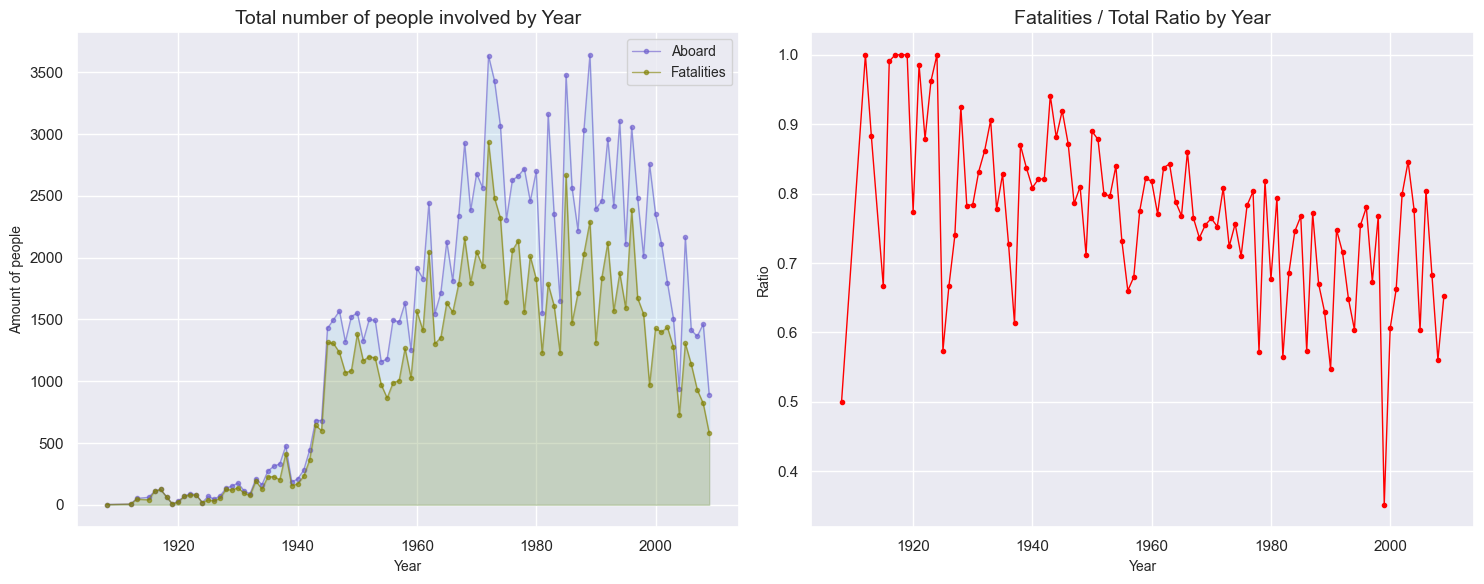

In [14]:
import matplotlib.pyplot as plt
import seaborn as sns


Fatalities = crashesDataframe.groupby(crashesDataframe.Time.dt.year)[['Aboard', 'Fatalities']].sum().reset_index()
Fatalities['Proportion'] = Fatalities['Fatalities'] / Fatalities['Aboard']

plt.figure(figsize=(15, 6))

# Plot 1
plt.subplot(1, 2, 1)
plt.fill_between(Fatalities['Time'], 'Aboard', data=Fatalities, color="skyblue", alpha=0.2)
plt.plot(Fatalities['Time'], 'Aboard', data=Fatalities, marker=".", color="Slateblue", alpha=0.6, linewidth=1, label='Aboard')
plt.fill_between(Fatalities['Time'], 'Fatalities', data=Fatalities, color="olive", alpha=0.2)
plt.plot(Fatalities['Time'], 'Fatalities', data=Fatalities, color="olive", marker=".", alpha=0.6, linewidth=1, label='Fatalities')
plt.legend(fontsize=10)
plt.xlabel('Year', fontsize=10)
plt.ylabel('Amount of people', fontsize=10)
plt.title('Total number of people involved by Year', loc='Center', fontsize=14)

# Plot 2
plt.subplot(1, 2, 2)
plt.plot(Fatalities['Time'], 'Proportion', data=Fatalities, marker=".", color='red', linewidth=1)
plt.xlabel('Year', fontsize=10)
plt.ylabel('Ratio', fontsize=10)
plt.title('Fatalities / Total Ratio by Year', loc='Center', fontsize=14)

plt.tight_layout()
plt.show()

<p><img alt="Insight logo" src="https://raw.githubusercontent.com/warazkhan/Data-Analysis-Project/main/statics.png" align="left" hspace="70px" vspace="5px" width="90" height="90" ></p>
 <br>
<ul style="list-style-type:none;">
  <li style="font-weight: bold;font-family:Trebuchet MS;font-size:35px;font-style: italic;color:bleu">&emsp;Analysis by Statics</li>
</ul>

In [15]:
ImputedValuesCrashesDataframe = crashesDataframe.copy()
numericData = ImputedValuesCrashesDataframe.select_dtypes(include=np.number).columns.tolist()
missingCounts = crashesDataframe[numericData].isna().sum().sort_values(ascending=False)
missingCounts[missingCounts > 0]

Aboard        22
Ground        22
Fatalities    12
dtype: int64

In [16]:
#Create the imputer
imputer = SimpleImputer(strategy = 'mean')
imputer.fit(ImputedValuesCrashesDataframe[numericData])
ImputedValuesCrashesDataframe[numericData] = imputer.transform(ImputedValuesCrashesDataframe[numericData])

In [17]:
staticalAnalysisCrashesDataframe = ImputedValuesCrashesDataframe[numericData].copy()

staticalAnalysisCrashesDataframe.reset_index(drop=True, inplace=True)

In [18]:
staticalAnalysisCrashesDataframe.describe().style.background_gradient(cmap='icefire')

In [19]:
# Correlation matrix
correlation_matrix = staticalAnalysisCrashesDataframe.corr()
print("Correlation Matrix:")
print(correlation_matrix)

Correlation Matrix:
              Aboard  Fatalities    Ground
Aboard      1.000000    0.756714  0.023236
Fatalities  0.756714    1.000000  0.035165
Ground      0.023236    0.035165  1.000000


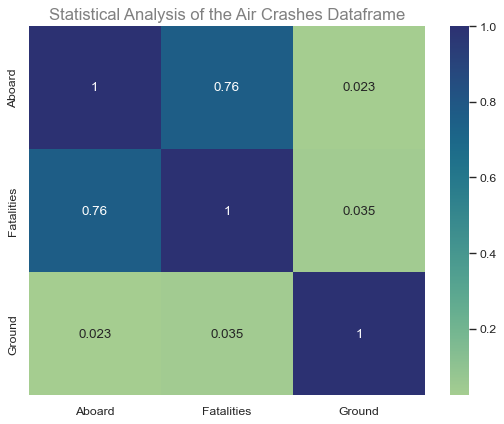

In [20]:
# plot correlation matrix using seaborn
fig, ax = plt.subplots(figsize=(8, 6), dpi=80)
sns.heatmap(correlation_matrix, annot=True, cmap="crest")

plt.title('Statistical Analysis of the Air Crashes Dataframe', size=15, color='grey')
plt.show()

<p><img alt="Insight logo" src="https://raw.githubusercontent.com/warazkhan/Data-Analysis-Project/main/countries-logo.png" align="left" hspace="50px" vspace="5px" width="70" height="80" ></p>
 <br>
<ul style="list-style-type:none;">
  <li style="font-weight: bold;font-family:Trebuchet MS;font-size:35px;font-style: italic;color:bleu">&emsp;Analysis by Country</li>
</ul>

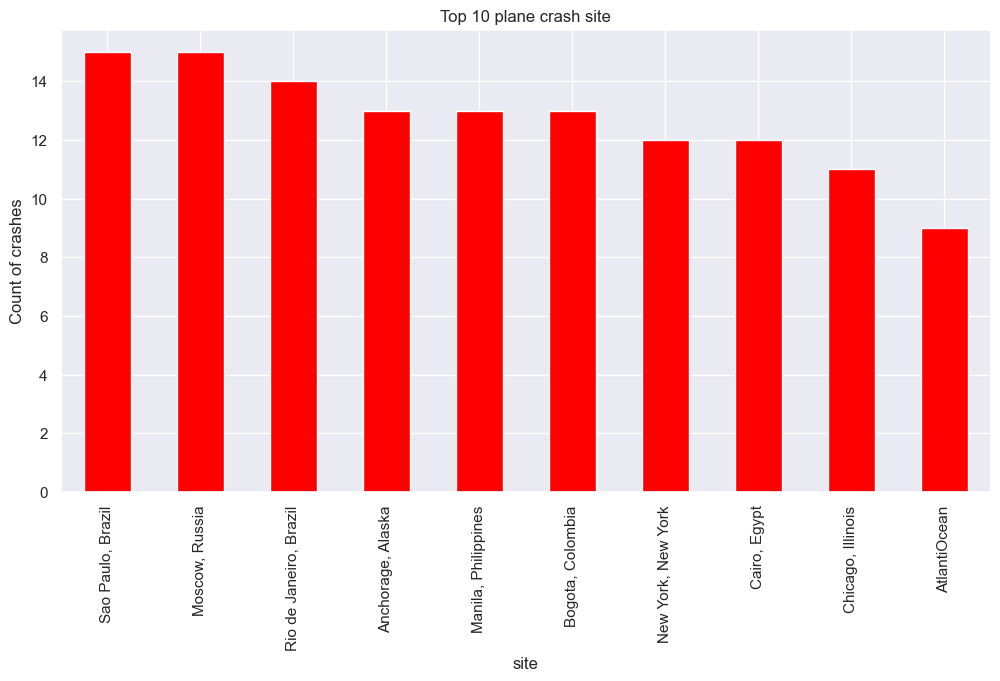

In [21]:
top_locations = crashesDataframe['Location'].value_counts().head(10)

plt.figure(figsize=(12, 6))
top_locations.plot(kind='bar', color='red')
plt.title("Top 10 plane crash site")
plt.xlabel('site')
plt.ylabel("Count of crashes")
plt.show()

<p><img alt="Insight logo" src="https://raw.githubusercontent.com/warazkhan/Data-Analysis-Project/main/Operator-logo.png" align="left" hspace="25px" vspace="5px" width="90" height="80" ></p>
 <br>
<ul style="list-style-type:none;">
  <li style="font-weight: bold;font-family:Trebuchet MS;font-size:35px;font-style: italic;color:bleu">&emsp;Analysis by Flight Operator</li>
</ul>

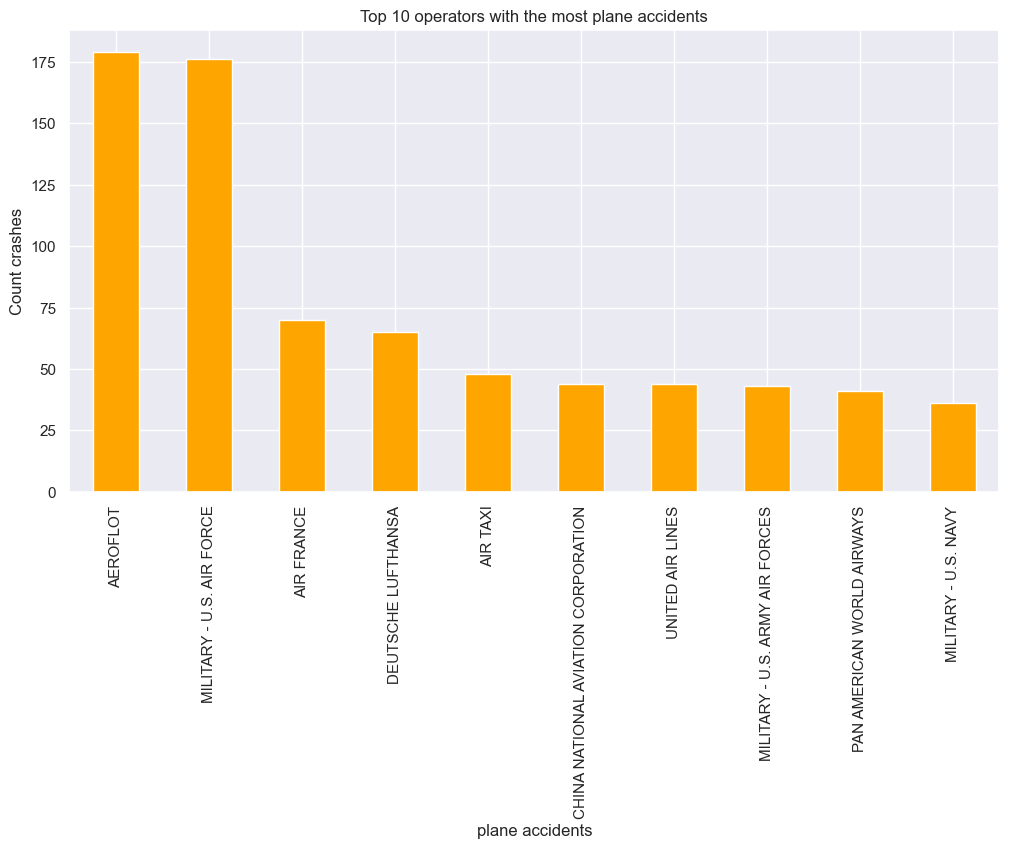

In [22]:
top_operators = crashesDataframe['Operator'].value_counts().head(10)


plt.figure(figsize=(12, 6))
top_operators.plot(kind='bar', color='orange')
plt.title('Top 10 operators with the most plane accidents')
plt.xlabel('plane accidents')
plt.ylabel('Count crashes')
plt.show()

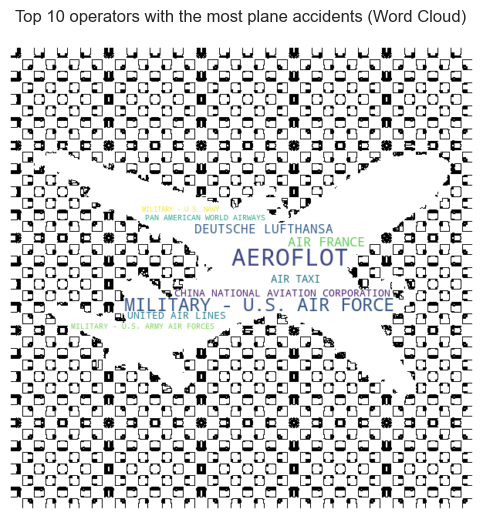

In [23]:
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt
from PIL import Image

# Load a silhouette image of an airplane
airplane_mask = np.array(Image.open(r"C:\Users\hp\Desktop\event1-datascience-CEC_CLUB-main\event1-datascience-CEC_CLUB-main\Competition\notebook\image.jpeg"))

# Define stopwords if needed
stopwords = set(STOPWORDS)

# Analyse des opérateurs
top_operators = crashesDataframe['Operator'].value_counts().head(10)

# Create a WordCloud object with the airplane mask
wordcloud = WordCloud(width=800, height=400, background_color='white', mask=airplane_mask, contour_color='black', contour_width=1, stopwords=stopwords).generate_from_frequencies(top_operators)

# Plot the WordCloud image
plt.figure(figsize=(12, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Top 10 operators with the most plane accidents (Word Cloud)\n')
plt.show()


## Number of died and alive by operator

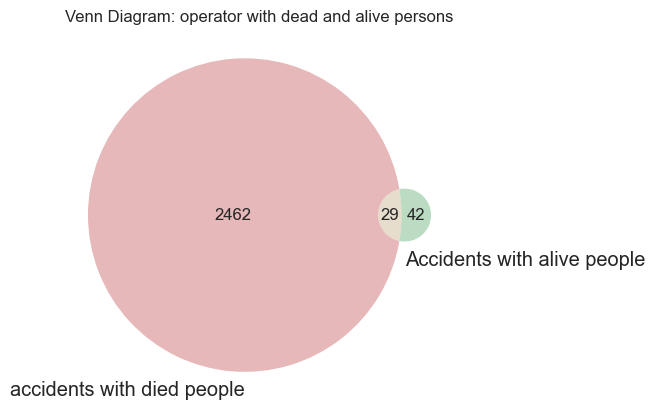

In [24]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib_venn import venn2
from collections import Counter

# Charger les données
data = pd.read_csv('Airplane_Crashes_and_Fatalities_Since_1908.csv')

# Créer un sous-ensemble des données avec les colonnes nécessaires
venn_data = data[['Operator', 'Fatalities']]

# Supprimer les lignes avec des valeurs manquantes dans les colonnes pertinentes
venn_data = venn_data.dropna(subset=['Operator', 'Fatalities'])

# Comptez le nombre d'occurrences pour chaque opérateur
operator_counts = dict(Counter(venn_data['Operator']))

# Filtrer les opérateurs les plus fréquents dans les accidents avec et sans décès
top_operators_fatalities = venn_data[venn_data['Fatalities'] > 0]['Operator'].unique()
top_operators_no_fatalities = venn_data[venn_data['Fatalities'] == 0]['Operator'].unique()

# Filtrer les opérateurs les plus fréquents dans les deux catégories
filtered_operators_fatalities = {k: v for k, v in operator_counts.items() if k in top_operators_fatalities}
filtered_operators_no_fatalities = {k: v for k, v in operator_counts.items() if k in top_operators_no_fatalities}

# Extraire les ensembles des opérateurs
set_operators_fatalities = set(filtered_operators_fatalities.keys())
set_operators_no_fatalities = set(filtered_operators_no_fatalities.keys())

# Créer un diagramme de Venn
venn2(subsets=(len(set_operators_fatalities), len(set_operators_no_fatalities),
               len(set_operators_fatalities.intersection(set_operators_no_fatalities))),
      set_labels=('accidents with died people', 'Accidents with alive people'))

plt.title('Venn Diagram: operator with dead and alive persons')
plt.show()


<p><img alt="Insight logo" src="https://raw.githubusercontent.com/warazkhan/Data-Analysis-Project/main/Operator-logo.png" align="left" hspace="25px" vspace="5px" width="90" height="80" ></p>
 <br>
<ul style="list-style-type:none;">
  <li style="font-weight: bold;font-family:Trebuchet MS;font-size:35px;font-style: italic;color:bleu">&emsp;Analysis by Flight Operator</li>
</ul>

In [25]:
import pandas as pd
import plotly.express as px

# Charger les données
data = pd.read_csv('Airplane_Crashes_and_Fatalities_Since_1908.csv')

# Créer un sous-ensemble des données avec les colonnes nécessaires
violin_data = data[['Type', 'Fatalities']]

# Supprimer les lignes avec des valeurs manquantes dans les colonnes pertinentes
violin_data = violin_data.dropna(subset=['Type', 'Fatalities'])

# Filtrer les avions avec plus de 50 décès
violin_data = violin_data[violin_data['Fatalities'] > 50]

# Créer le Violin Plot interactif avec une palette de couleurs différente
fig = px.violin(violin_data, x='Type', y='Fatalities',
                box=True, points="all",
                title='Distribution des nombres de décès à bord par type d\'avion (avec plus de 50 décès)',
                labels={'Fatalities': 'Nombre de décès à bord', 'Type': 'Type d\'avion'},
                color_discrete_sequence=px.colors.qualitative.Pastel1,  # Choisir une palette de couleurs
                violinmode='overlay')

# Ajuster la mise en page
fig.update_layout(
    xaxis=dict(tickangle=45),
    yaxis=dict(title='Nombre de décès à bord'),
    showlegend=False
)

# Afficher la figure interactive
fig.show()


In [26]:
import pandas as pd
import plotly.express as px

# Charger les données
data = pd.read_csv('Airplane_Crashes_and_Fatalities_Since_1908.csv')

# Créer un sous-ensemble des données avec les colonnes nécessaires
network_data = data[['Operator', 'Route']]

# Supprimer les lignes avec des valeurs manquantes dans les colonnes pertinentes
network_data = network_data.dropna(subset=['Operator', 'Route'])

# Compter le nombre d'occurrences de chaque paire (Opérateur, Route)
edge_weights = network_data.groupby(['Operator', 'Route']).size().reset_index(name='Weight')

# Filtrer les arêtes avec un poids supérieur à une certaine valeur (par exemple, 5)
edge_weights = edge_weights[edge_weights['Weight'] > 5]

# Créer un réseau interactif avec Plotly
fig = px.scatter(edge_weights, x='Operator', y='Route', size='Weight', color='Weight',
                 hover_name='Operator', hover_data=['Route', 'Weight'],
                 title='Réseau des opérateurs et des routes dans les accidents d\'avion',
                 labels={'Weight': 'Nombre d\'occurrences'},
                 size_max=15)

# Ajuster la mise en page
fig.update_layout(showlegend=False)

# Afficher la figure interactive
fig.show()


<p><img alt="Insight logo" src="https://raw.githubusercontent.com/warazkhan/Data-Analysis-Project/main/allinsight-logo.png" align="left" hspace="0px" vspace="10px" width="80" height="80"></p>
<br>
<ul style="list-style-type:none;">
  <li style="font-weight: bold;font-family:Trebuchet MS;font-size:30px;font-style: italic;color:  red">&emsp;All Insights:</li>
</ul>

<div class="alert alert-info" role="alert">
<ul style="list-style-type:none;font-family:Trebuchet MS;font-size:17px;color:black"> 
    <li>1. The<span style="font-weight: bold; color:#122ecc;"> Map </span>summarizes information about each country where air crashes occurred, such as <span style="font-weight: bold; color:#122ecc;">Country's name</span>, <span style="font-weight: bold; color:#122ecc;">Continent</span>, <span style="font-weight: bold; color:#122ecc;">Year</span>, <span style="font-weight: bold; color:#122ecc;">Time</span>, <span style="font-weight: bold; color:#122ecc;">Air craft</span>, <span style="font-weight: bold; color:#122ecc;">Air Operator</span>, <span style="font-weight: bold; color:#122ecc;">Number of Crashes </span>and <span style="font-weight: bold; color:#122ecc;">Fatalities due to Air Crash</span>.</li>
    <br>
    <li>2. <span style="font-weight: bold; color:#122ecc;">Canada </span>has suffered <span style="font-weight: bold; color:#122ecc;">92 air crashes</span>, which is the<span style="font-weight: bold; color:#122ecc;"> highest</span> in the world.</li>
    <br>
    <li>3. <span style="font-weight: bold; color:#122ecc;"> Colombia </span>has suffered <span style="font-weight: bold; color:#122ecc;">86 air crashes</span>, the<span style="font-weight: bold; color:#122ecc;"> second highest </span>in the world.</li>
    <br>
    <li>4. In <span style="font-weight: bold; color:#122ecc;">Slovenia</span>,
        <span style="font-weight: bold; color:#122ecc;">Lebanon</span>,
 <span style="font-weight: bold; color:#122ecc;">Albania</span>,
 <span style="font-weight: bold; color:#122ecc;">Tajikistan</span>,
<span style="font-weight: bold; color:#122ecc;">Belize</span>,
 <span style="font-weight: bold; color:#122ecc;">Botswana</span>,
 <span style="font-weight: bold; color:#122ecc;">Israel</span>,
<span style="font-weight: bold; color:#122ecc;">Ghana</span>,
<span style="font-weight: bold; color:#122ecc;">Kyrgyzstan</span>,
<span style="font-weight: bold; color:#122ecc;">Bangladeshr</span>,
 <span style="font-weight: bold; color:#122ecc;">Croatia</span>,
 <span style="font-weight: bold; color:#122ecc;">Yemen</span>
 <span style="font-weight: bold; color:#122ecc;">Mali</span>,
 <span style="font-weight: bold; color:#122ecc;">Central African Rep.</span>,
 <span style="font-weight: bold; color:#122ecc;">Luxembourg</span>,
 <span style="font-weight: bold; color:#122ecc;">Qatar</span>,
 <span style="font-weight: bold; color:#122ecc;">Czechia</span>,
 <span style="font-weight: bold; color:#122ecc;">Suriname</span>,
 <span style="font-weight: bold; color:#122ecc;">Benin</span>,
 <span style="font-weight: bold; color:#122ecc;">Tunisia</span>,
 <span style="font-weight: bold; color:#122ecc;">Belarus</span>,
 <span style="font-weight: bold; color:#122ecc;">Bulgaria</span>,
 <span style="font-weight: bold; color:#122ecc;">Eritrea</span> and
 <span style="font-weight: bold; color:#122ecc;">Malawi</span>, there have been only <span style="font-weight: bold; color:#122ecc;">one air crash </span> from <span style="font-weight: bold; color:#122ecc;">1908 to 2009</span> .</li>
    <br>
    <li>5. <span style="font-weight: bold; color:#122ecc;">India </span>has suffered <span style="font-weight: bold; color:#122ecc;">2456 fatalities</span> in <span style="font-weight: bold; color:#122ecc;">61 air crashes</span>, which is the<span style="font-weight: bold; color:#122ecc;"> highest rate</span> in the world.</li>
    <br>
    <li>6. <span style="font-weight: bold; color:#122ecc;"> Colombia </span>has suffered <span style="font-weight: bold; color:#122ecc;">2091 fatalities</span> in <span style="font-weight: bold; color:#122ecc;">86 air crashes</span>, the<span style="font-weight: bold; color:#122ecc;"> second highest </span>in the world.</li>
    <br>
    <li>7. <span style="font-weight: bold; color:#122ecc;"> Czechia</span> and <span style="font-weight: bold; color:#122ecc;">Qatar </span>has the <span style="font-weight: bold; color:#122ecc;">lowest number of fatalities</span> due to air crashes, with <span style="font-weight: bold; color:#122ecc;">two fatalities</span> in a<span style="font-weight: bold; color:#122ecc;"> single crashes </span>.</li>
    <br>
    <li>8. <span style="font-weight: bold; color:#122ecc;">Asia </span>has suffered <span style="font-weight: bold; color:#122ecc;">490 air crashes</span> from <span style="font-weight: bold; color:#122ecc;">1908 to 2009</span>, which is the<span style="font-weight: bold; color:#122ecc;"> highest</span> in the world.</li>
    <br>
    <li>9. <span style="font-weight: bold; color:#122ecc;"> Europe </span>has suffered <span style="font-weight: bold; color:#122ecc;">435 air crashes</span> from <span style="font-weight: bold; color:#122ecc;">1908 to 2009</span>, the<span style="font-weight: bold; color:#122ecc;"> second highest </span>in the world.</li>
    <br>
    <li>10. In <span style="font-weight: bold; color:#122ecc;">Oceania</span>, there are <span style="font-weight: bold; color:#122ecc;">75 air crashes</span> from <span style="font-weight: bold; color:#122ecc;">1908 to 2009</span>, the <span style="font-weight: bold; color:#122ecc;">lowest number</span> in the world.</li>
    <br> 
    <li>11. <span style="font-weight: bold; color:#122ecc;">Asia </span>has suffered <span style="font-weight: bold; color:#122ecc;">19751 fatalities</span> in <span style="font-weight: bold; color:#122ecc;">490 air crashes</span>, which is the<span style="font-weight: bold; color:#122ecc;"> highest rate</span> in the world.</li>
    <br>
    <li>12. <span style="font-weight: bold; color:#122ecc;"> Europe </span>has suffered <span style="font-weight: bold; color:#122ecc;">15064 fatalities</span> in <span style="font-weight: bold; color:#122ecc;">435 air crashes</span>, the<span style="font-weight: bold; color:#122ecc;"> second highest </span>in the world.</li>
    <br>
    <li>13. <span style="font-weight: bold; color:#122ecc;"> Oceania </span>has the <span style="font-weight: bold; color:#122ecc;">lowest number of fatalities</span> due to air crashes, with <span style="font-weight: bold; color:#122ecc;">1230 fatalities</span> in<span style="font-weight: bold; color:#122ecc;"> 75 air crashes</span>.</li>
    <br>
    <li>14. The <span style="font-weight: bold; color:#122ecc;"> maximum number of air crashes</span> is <span style="font-weight: bold; color:#122ecc;"> 104</span>, occurred in <span style="font-weight: bold; color:#122ecc;">1972</span> between 1908 and 2009.</li>
    <br>
    <li>15. <span style="font-weight: bold; color:#122ecc;"> 1912 </span>and <span style="font-weight: bold; color:#122ecc;">1908</span> had the  <span style="font-weight: bold; color:#122ecc;">fewest air crashes</span>, only<span style="font-weight: bold; color:#122ecc;"> one </span>between 1908 to 2009.</li>
    <br>
     <li>16. The <span style="font-weight: bold; color:#122ecc;"> maximum number of fatalities</span> is <span style="font-weight: bold; color:#122ecc;">2937</span> in <span style="font-weight: bold; color:#122ecc;">104 air crashes</span>, occurred in <span style="font-weight: bold; color:#122ecc;">1972</span> between 1908 and 2009.</li>
    <br>
    <li>17. The <span style="font-weight: bold; color:#122ecc;"> minimum number of fatalities</span> is <span style="font-weight: bold; color:#122ecc;">1</span> in a<span style="font-weight: bold; color:#122ecc;">single air crash</span>, occurred in <span style="font-weight: bold; color:#122ecc;">1908</span> between 1908 and 2009.</li>
    <br>
    <li>18. The graph shows the <span style="font-weight: bold; color:#122ecc;"> rate of fatalities</span> and <span style="font-weight: bold; color:#122ecc;">survivors</span> in <span style="font-weight: bold; color:#122ecc;"> air crashes</span> every year from<span style="font-weight: bold; color:#122ecc;"> 1908</span> to <span style="font-weight: bold; color:#122ecc;">2009</span>.</li>     
    <br>
     <li>19. Globally, the <span style="font-weight: bold; color:#122ecc;"> most air crashes</span> occurred around <span style="font-weight: bold; color:#122ecc;">9:00</span> in the <span style="font-weight: bold; color:#122ecc;"> morning</span>.</li>     
    <br>
    <li>20. <span style="font-weight: bold; color:#122ecc;"> Nighttime 3:00</span> is the <span style="font-weight: bold; color:#122ecc;">least affected time duration</span> when air crashes occurred from the year<span style="font-weight: bold; color:#122ecc;"> 1908</span> to<span style="font-weight: bold; color:#122ecc;"> 2009</span>.</li>
    <br>
     <li>21. Out of all Air Operators,<span style="font-weight: bold; color:#122ecc;"> Passenger Airlines</span> are the <span style="font-weight: bold; color:#122ecc;">most affected ones</span>, with <span style="font-weight: bold; color:#122ecc;"> 89.2%</span>.</li>     
    <br>          
    <li>22. <span style="font-weight: bold; color:#122ecc;"> Military Operators</span> are the<span style="font-weight: bold; color:#122ecc;"> second most</span> affected ones. Among them, <span style="font-weight: bold; color:#122ecc;">Air Force</span> has experienced<span style="font-weight: bold; color:#122ecc;"> more crashes</span> , around <span style="font-weight: bold; color:#122ecc;"> 78%</span>.</li>
    <br>
    <li>23. With the <span style="font-weight: bold; color:#122ecc;"> highest fatality rate</span> the graphs clearly show that<span style="font-weight: bold; color:#122ecc;"> Passenger Airlines</span> are the <span style="font-weight: bold; color:#122ecc;">most affected Air Operators</span>, almost every year.</li>     
    <br>
</ul>
</div>

<p><img alt="Insight logo" src="https://raw.githubusercontent.com/warazkhan/Data-Analysis-Project/main/refrences-logo.png" align="left" hspace="0px" vspace="10px" width="80" height="80"></p>
<br>
<ul style="list-style-type:none;">
  <li style="font-weight: bold;font-family:Trebuchet MS;font-size:30px;font-style: italic;color:  red">&emsp;Refrences:</li>
</ul>      

<div class="alert alert-warning" role="alert">
<ul style="list-style-type:none;font-family:Trebuchet MS;font-size:17px;color:black"> 
    <li>1. <span style="font-weight: bold; color:#122ecc;"> ChatGpt</li>     
    <br>          
    <li>2. <span style="font-weight: bold; color:#122ecc;"> My brain</li>     
    <br>
    <li>3. <span style="font-weight: bold; color:#122ecc;">BinatnaData</li>       
    <br>   
</ul>
</div>

 <img alt="Insight logo" src="https://mir-s3-cdn-cf.behance.net/project_modules/1400_opt_1/0c795874333139.5c3e657b811ff.gif" align="left" hspace="0px" vspace="0px" width=100% height=0 >
 
